# Hospital Schema - SQL Queries

# Objective

The object of this project is to perform queries on the hospital schema to 
answer related business questions. 

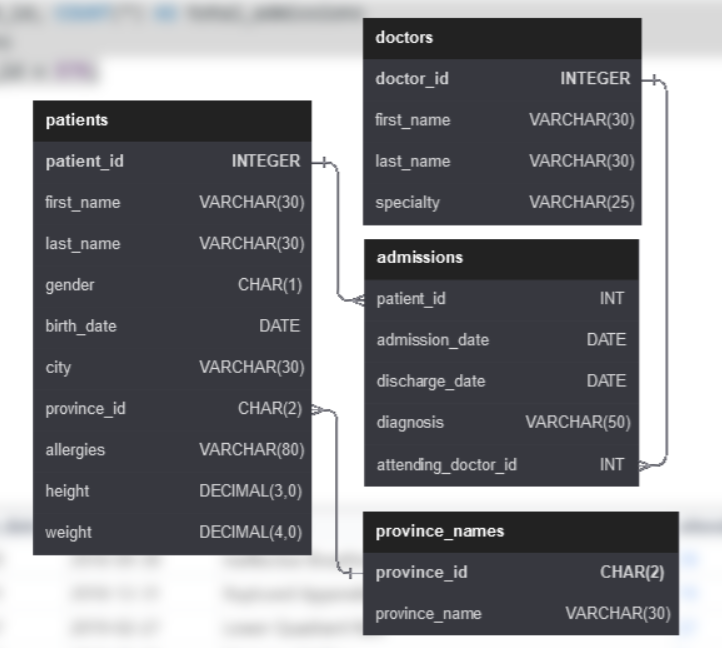

## Show first name, last name, and gender of patients whose gender is 'M'

In [ ]:
SELECT first_name, last_name, gender
from patients
where gender = 'M';

## Show first name and last name of patients who does not have allergies. (null)

In [ ]:
SELECT first_name, last_name
FROM patients
where allergies is null;

## Show first name of patients that start with the letter 'C'

In [ ]:
SELECT first_name
from patients
where first_name like 'c%';

## Show first name and last name of patients that weight within the range of 100 to 120 (inclusive)

In [ ]:
SELECT first_name, last_name
from patients
where weight BETWEEN 100 AND 120;

## Update the patients table for the allergies column. If the patient's allergies is null then replace it with 'NKA'

In [ ]:
UPDATE patients
set allergies = 'NKA'
where allergies IS NULL;

## Show first name and last name concatinated into one column to show their full name.

In [ ]:
select concat(first_name, ' ', last_name)
from patients;

## Show first name, last name, and the full province name of each patient.

Example: 'Ontario' instead of 'ON'

In [ ]:
select first_name, last_name, province_name
from patients
JOIN province_names
ON province_names.province_id = patients.province_id;

## Show how many patients have a birth_date with 2010 as the birth year.

In [ ]:
SELECT count(*)
from patients
WHERE YEAR(birth_date) = 2010;

## Show the first_name, last_name, and height of the patient with the greatest height.

In [ ]:
SELECT first_name, last_name, Max(height)
from patients
limit 1;

## Show all columns for patients who have one of the following patient_ids:
## 1,45,534,879,1000 ## 

In [ ]:
SELECT *
FROM patients
where patient_id in (1, 45, 534, 879, 1000);

## Show the total number of admissions

In [ ]:
SELECT count(*)
FROM admissions;

## Show all the columns from admissions where the patient was admitted and discharged on the same day.

In [ ]:
SELECT *
FROM admissions
WHERE admission_date = discharge_date;

## Show the patient id and the total number of admissions for patient_id 579.

In [ ]:
SELECT patient_id, count(*) as total_admissions
FROM admissions
WHERE patient_id = 579;

## Based on the cities that our patients live in, show unique cities that are in province_id 'NS'?

In [ ]:
SELECT DISTINCT(city)
FROM patients
WHERE province_id = 'NS';

##  Write a query to find the first_name, last name and birth date of patients who has height greater than 160 and weight greater than 70

In [ ]:
SELECT first_name, last_name, birth_date
FROM patients
WHERE height > 160 AND weight > 70;

## Write a query to find list of patients first_name, last_name, and allergies where allergies are not null and are from the city of 'Hamilton'

In [ ]:
SELECT first_name, last_name, allergies
FROM patients
WHERE allergies is not NULL AND city = 'Hamilton';

## Show unique birth years from patients and order them by ascending.

In [ ]:
SELECT Distinct YEAR(birth_date) AS birth_year
FROM patients
ORDER BY birth_date;

## Show unique first names from the patients table which only occurs once in the list.

## For example, if two or more people are named 'John' in the first_name column then don't include their name in the output list. If only 1 person is named 'Leo' then include them in the output.

In [ ]:
SELECT DISTINCT(first_name)
from patients
group by first_name
HAVING COUNT(first_name) = 1;

## Show patient_id and first_name from patients where their first_name start and ends with 's' and is at least 6 characters long.

In [ ]:
SELECT patient_id, first_name
from patients
where first_name Like 's____%s';

## Show patient_id, first_name, last_name from patients whos diagnosis is 'Dementia'.

Primary diagnosis is stored in the admissions table.

In [ ]:
SELECT patients.patient_id, first_name, last_name
from admissions
join patients
ON admissions.patient_id = patients.patient_id
where diagnosis = 'Dementia';

## Display every patient's first_name. Order the list by the length of each name and then by alphabetically.

In [ ]:
SELECT first_name
from patients
ORDER by len(first_name), first_name;

## Show the total amount of male patients and the total amount of female patients in the patients table. Display the two results in the same row.

In [ ]:
SELECT
(SElect count(*) from patients WHERE gender = 'M') as male_count,
(SElect count(*) from patients WHERE gender = 'F') as female_count;

## Show first and last name, allergies from patients which have allergies to either 'Penicillin' or 'Morphine'. Show results ordered ascending by allergies then by first_name then by last_name.

In [ ]:
SELECT first_name, last_name, allergies 
FROM patients
where allergies IN('Penicillin', 'Morphine')
ORDER by allergies, first_name, last_name;

## Show patient_id, diagnosis from admissions. Find patients admitted multiple times for the same diagnosis.

In [ ]:
SELECT patient_id, diagnosis 
FROM admissions
GROUP BY patient_id, diagnosis
having count(*) > 1;

## Show the city and the total number of patients in the city. Order from most to least patients and then by city name ascending.

In [ ]:
SELECT city, COUNT(*) AS num_patients
FROM patients
group by city
ORDER BY num_patients desc, city asc;

## Show first name, last name and role of every person that is either patient or doctor.
The roles are either "Patient" or "Doctor"

In [ ]:
SELECT first_name, last_name, 'Patient' AS role FROM patients
UNION ALL 
SELECT first_name, last_name, 'Doctor' FROM doctors;

## Show all allergies ordered by popularity. Remove NULL values from query.

In [ ]:
select allergies, COUNT(*)
from patients
WHERE allergies not null
GROUP BY  allergies
ORDER BY count(*) desc;

## Show all patient's first_name, last_name, and birth_date who were born in the 1970s decade. Sort the list starting from the earliest birth_date.

In [ ]:
SELECT first_name, last_name, birth_date
FROM patients
where YEAR(birth_date) LIKE '197%'
ORDER BY birth_date;

## We want to display each patient's full name in a single column. Their last_name in all upper letters must appear first, then first_name in all lower case letters. Separate the last_name and first_name with a comma. Order the list by the first_name in decending order
EX: SMITH,jane

In [ ]:
SELECT CONCAT(Upper(last_name), ',', lower(first_name))
FROM patients
ORDER BY first_name desc;

## Show the province_id(s), sum of height; where the total sum of its patient's height is greater than or equal to 7,000.

In [ ]:
SELECT province_id, sum(height)
FROM patients
GROUP BY Province_id
HAVING SUM(height) >= 7000;

## Show the difference between the largest weight and smallest weight for patients with the last name 'Maroni'

In [ ]:
SELECT mAX(weight) - Min(weight)
FROM patients
WHERE last_name = 'Maroni';

## Show all of the days of the month (1-31) and how many admission_dates occurred on that day. Sort by the day with most admissions to least admissions.

In [ ]:
SELECT DAY(admission_date) as day_number, COUNT(*) as number_of_admissions
FROM admissions
GROUP BY day_number
ORDER BY number_of_admissions DESC;

## Show all columns for patient_id 542's most recent admission_date.

In [ ]:
SELECT *
FROM admissions
WHERE patient_id = 542
GROUP BY patient_id
having admission_date = max(admission_date);

## Show patient_id, attending_doctor_id, and diagnosis for admissions that match one of the two criteria:
* 1. patient_id is an odd number and attending_doctor_id is either 1, 5, or 19.
*2. attending_doctor_id contains a 2 and the length of patient_id is 3 characters.

In [ ]:
SELECT patient_id, attending_doctor_id, diagnosis
FROM admissions
WHERE (
  attending_doctor_id IN (1, 5, 19)
  and patient_id % 2 !=0 )
  OR (
attending_doctor_id LIKE '%2%' and len(patient_id) = 3)
;

## Show first_name, last_name, and the total number of admissions attended for each doctor. Every admission has been attended by a doctor.

In [ ]:
SELECT first_name, last_name, count(*) AS admissions_total
FROM admissions a
JOIN doctors ph
on ph.doctor_id = a.attending_doctor_id
GROUP BY attending_doctor_id;

## For each doctor, display their id, full name, and the first and last admission date they attended.

In [ ]:
SELECT doctor_id, first_name || ' ' || last_name as full_name, 
MIN(admission_date) AS first_admission_date, Max(admission_date) as last_admission_date
FROM doctors
join admissions
ON admissions.attending_doctor_id = doctors.doctor_id
GROUP BY doctor_id;

## Display the total amount of patients for each province. Order by descending.

In [ ]:
SELECT count(*) as num_patients, province_name
from patients
JOIN province_names
on patients.province_id = province_names.province_id
GROUP BY province_name
ORDER BY num_patients desc;

## For every admission, display the patient's full name, their admission diagnosis, and their doctor's full name who diagnosed their problem.

In [ ]:
SELECT CONCAT(patients.first_name, ' ', patients.last_name) as patients_name, diagnosis, 
	CONCAT(doctors.first_name, ' ', doctors.last_name) as doctor_name
from patients
join admissions
ON admissions.patient_id = patients.patient_id
JOIN doctors
ON doctors.doctor_id = admissions.attending_doctor_id
;

## display the first name, last name and number of duplicate patients based on their first name and last name.

Ex: A patient with an identical name can be considered a duplicate.

In [ ]:
SELECT first_name, last_name, count(*) as num_of_duplicates
from patients
GROUP BY first_name, last_name
HAVING COUNT(*) > 1;

## Display patient's full name, height in the units feet rounded to 1 decimal, weight in the unit pounds rounded to 0 decimals, birth_date, gender non abbreviated.

Convert CM to feet by dividing by 30.48.
Convert KG to pounds by multiplying by 2.205.

In [ ]:
SELECT 
	CONCAT(first_name, ' ', last_name) AS 'patient_name', 
	ROUND(height / 30.48, 1) as height_in_ft, 
	ROUND(weight * 2.205,0) as weight_in_lbs, birth_date,
CASE
WHEN gender = 'M' THEN 'Male'
ELSE 'Female'
end as 'gender_type'
from patients;

## Show patient_id, first_name, last_name from patients whose does not have any records in the admissions table. (Their patient_id does not exist in any admissions.patient_id rows.)

In [ ]:
SELECT 
patients.patient_id, first_name, last_name
FROM patients
left join admissions
ON patients.patient_id = admissions.patient_id
where admissions.patient_id IS NULL;

##  Show all of the patients grouped into weight groups. Show the total amount of patients in each weight group. Order the list by the weight group decending.

For example, if they weight 100 to 109 they are placed in the 100 weight group, 110-119 = 110 weight group, etc.

In [ ]:
SELECT 
COUNT(*) as patient_in_group,
FLOOR(weight / 10) * 10 AS weight_group
FROM patients
group by weight_group
ORDER BY weight_group desc;

## Show patient_id, weight, height, isObese from the patients table.

* Display isObese as a boolean 0 or 1.

* Obese is defined as weight(kg)/(height(m)2) >= 30.

* weight is in units kg.

* height is in units cm.

In [ ]:
SELECT patient_id, weight, height, 
weight/POWER(CAST(height AS float) / 100, 2) >= 30 as Obese
FROM patients;

## Show patient_id, first_name, last_name, and attending doctor's specialty.
Show only the patients who has a diagnosis as 'Epilepsy' and the doctor's first name is 'Lisa'

Check patients, admissions, and doctors tables for required information.

In [ ]:
SELECT patients.patient_id, patients.first_name, patients.last_name, specialty 
FROM patients
join admissions
on patients.patient_id = admissions.patient_id
join doctors
ON admissions.attending_doctor_id = doctors.doctor_id
where diagnosis = 'Epilepsy' and doctors.first_name = 'Lisa';

## All patients who have gone through admissions, can see their medical documents on our site. Those patients are given a temporary password after their first admission. Show the patient_id and temp_password. The password must be the following, in order:
1. patient_id
2. the numerical length of patient's last_name
3. year of patient's birth_date

In [ ]:
SELECT DISTINCT patients.patient_id, 
CONCAT(patients.patient_id,Len(last_name),Year(birth_date)) as temp_password
FROM patients
join admissions
on patients.patient_id = admissions.patient_id
;

## Each admission costs 50 dollars for patients without insurance, and 10 dollars for patients with insurance. All patients with an even patient_id have insurance. Give each patient a 'Yes' if they have insurance, and a 'No' if they don't have insurance. Add up the admission_total cost for each has_insurance group.

In [ ]:
SELECT 
case 
WHEN patient_id % 2 = 0 then 'Yes'
ELSE 'No'
end AS has_insurance,
sum(case when patient_id % 2 = 0 THEN 10
    ELSE 50
    END) as cost_after_insurance
FROM admissions
group BY has_insurance;
;

## Show the provinces that has more patients identified as 'M' than 'F'. Must only show full province_name

In [ ]:
SELECT province_name
FROM patients
JOIN province_names
ON patients.province_id = province_names.province_id
GROUP BY province_name
having SUM(gender = 'M') > sum(gender = 'F');

## We are looking for a specific patient. Pull all columns for the patient who matches the following criteria:
- First_name contains an 'r' after the first two letters.
- Identifies their gender as 'F'
- Born in February, May, or December
- Their weight would be between 60kg and 80kg
- Their patient_id is an odd number
- They are from the city 'Kingston'

In [ ]:
SELECT *
FROM patients
WHERE first_name LIKE '__r%'
and gender = 'F'
and (MONTH(birth_date) = 2 OR MONTH(birth_date) = 5 or Month(birth_date) = 12)
and weight BETWEEN 60 and 80
AND patient_id % 2 = 1
and city = 'Kingston'
;

## Show the percent of patients that have 'M' as their gender. Round the answer to the nearest hundreth number and in percent form.

In [ ]:
SELECT 
ROUND(100 * avg(gender = 'M'), 2) || '%' AS percent_of_male_patients 
FROM patients;

## For each day display the total amount of admissions on that day. Display the amount changed from the previous date.

In [ ]:
SELECT admission_date,
count(admission_date) as admission_day,
COUNT(admission_date) - LAG(COUNT(admission_date)) OVER(ORDER BY admission_date) as admission_count_change
FROM admissions
GROUP BY admission_date;

## Sort the province names in ascending order in such a way that the province 'Ontario' is always on top.

In [ ]:
SELECT province_name
FROM province_names
ORDER by 
province_name = 'Ontario' DESC,
province_name;

## We need a breakdown for the total amount of admissions each doctor has started each year. Show the doctor_id, doctor_full_name, specialty, year, total_admissions for that year.

In [ ]:
SELECT doctor_id, 
concat(doctors.first_name, ' ', doctors.last_name) AS doctor_name, 
specialty, Year(admission_date) as selected_year,
count(*) as total_admissions
FROM doctors
LEFT join admissions 
on admissions.attending_doctor_id = doctors.doctor_id
group by doctor_name, selected_year
order by doctor_id, selected_year;